# Accuracy of Simpson's Rule

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

In [2]:
simpson_weights = np.array([1/6, 4/6, 1/6])
simpson_weights

array([ 0.16666667,  0.66666667,  0.16666667])

Here is a function and its definite integral:

$$\text{int_f}(x)=\int_0^x f(\xi)d\xi$$

In [1]:
alpha = 4

def f(x):
    return np.cos(alpha*x)
def int_f(x):
    return 1/alpha*(np.sin(alpha*x)-np.sin(alpha*0))

Plotted:

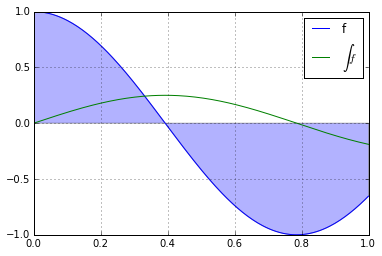

In [53]:
plot_x = np.linspace(0, 1, 200)

pt.plot(plot_x, f(plot_x), label="f")
pt.fill_between(plot_x, 0*plot_x, f(plot_x),alpha=0.3)
pt.plot(plot_x, int_f(plot_x), label="$\int f$")
pt.grid()
pt.legend(loc="best")

This here plots the function, the interpolant, and the area under the interpolant:

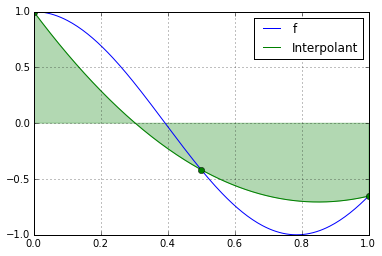

In [61]:
# fix nodes
h = 1
x = np.linspace(0, h, 3)

# find interpolant
V = np.array([
  1+0*x,
  x,
  x**2
]).T
a, b, c = la.solve(V, f(x))
interpolant = a + b*plot_x + c*plot_x**2

# plot
pt.plot(plot_x, f(plot_x), label="f")
pt.plot(plot_x, interpolant, label="Interpolant")
pt.fill_between(plot_x, 0*plot_x, interpolant, alpha=0.3, color="green")
pt.plot(x, f(x), "og")
pt.grid()
pt.legend(loc="best")

In [55]:
true_val = int_f(h)
error = (f(x).dot(simpson_weights) * h - true_val)/true_val
print(error)

0.161228524153


* Compare the error for $h=1,0.5,0.25$. What order of accuracy do you observe?